In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gdown

In [3]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
output_file = "aerofit_treadmill.csv"

gdown.download(url, output_file, quiet=False)

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv
100%|██████████| 7.28k/7.28k [00:00<00:00, 23.4MB/s]


'aerofit_treadmill.csv'

In [4]:
df = pd.read_csv("aerofit_treadmill.csv")


In [5]:
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Name: cou

In [8]:
conditions = [(df['Income'] >= 60000),
              (df['Income'] >= 30000) & (df['Income'] < 60000),
              (df['Income'] < 30000)]
choices = ['high', 'medium', 'low']
df['income range'] = pd.Series(np.select(conditions, choices))

In [9]:
bins = [18, 25, 35, 50]

# Create labels for the bins
labels = ['18-25', '26-35', '36-50']

# Add a new column to the dataframe containing the bin labels
df['Age_Bracket'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Print the new dataframe with the age brackets
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income range,Age_Bracket
0,KP281,18,Male,14,Single,3,4,29562,112,low,18-25
1,KP281,19,Male,15,Single,2,3,31836,75,medium,18-25
2,KP281,19,Female,14,Partnered,4,3,30699,66,medium,18-25
3,KP281,19,Male,12,Single,3,3,32973,85,medium,18-25
4,KP281,20,Male,13,Partnered,4,2,35247,47,medium,18-25
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,high,36-50
176,KP781,42,Male,18,Single,5,4,89641,200,high,36-50
177,KP781,45,Male,16,Single,5,5,90886,160,high,36-50
178,KP781,47,Male,18,Partnered,4,5,104581,120,high,36-50


Based on the statistical summary, the following observations can be made:

The sample contains 180 individuals with a mean age of approximately 29 years.
The average education level is around 15 years, with a minimum of 12 years and a maximum of 21 years.
The average usage is around 3.5 times per week, with a minimum of 2 times and a maximum of 7 times.
The average fitness level is around 3.3, with a minimum of 1 and a maximum of 5.
The average income is approximately 53,700 USD per year, with a standard deviation of 16,500 USD.
The average distance covered in a week is around 103 miles, with a minimum of 21 miles and a maximum of 360 miles.
Overall, the sample appears to be relatively healthy and active, with a high level of education and a moderate income.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   income range   180 non-null    object  
 10  Age_Bracket    180 non-null    category
dtypes: category(1), int64(6), object(4)
memory usage: 14.5+ KB


In [11]:
df.shape

(180, 11)

In [12]:
# as we can see , we dont have any missing values in our data

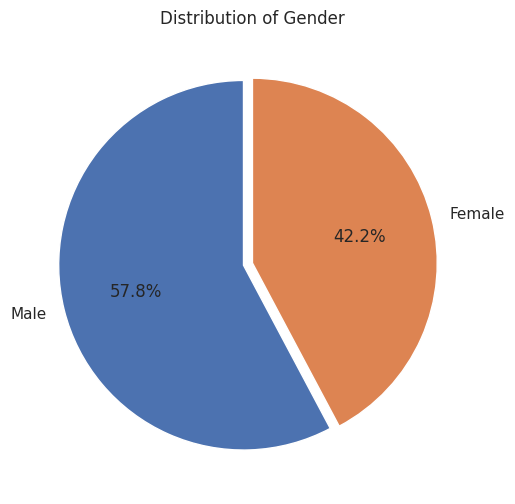

In [13]:
gender_count = df['Gender'].value_counts()

# create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, explode=[0.05,0])
plt.title('Distribution of Gender')
plt.show()

In [14]:
gender_count = df['Gender'].value_counts()
gender_count

Gender
Male      104
Female     76
Name: count, dtype: int64

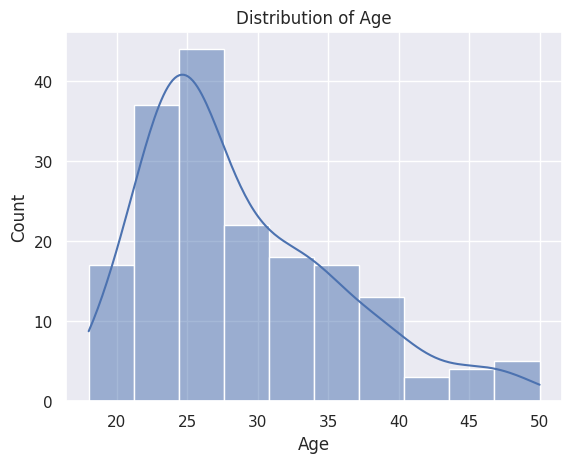

In [15]:
sns.set_style("darkgrid")

# create a histogram plot with 10 bins
sns.histplot(df['Age'], bins=10 , kde = True)

# set the plot title and axis labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# show the plot
plt.show()

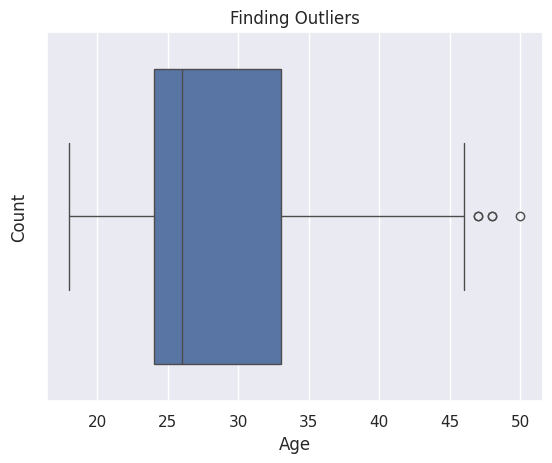

In [16]:
sns.boxplot(x=df["Age"])
plt.title('Finding Outliers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [17]:
df["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [18]:
mean = df["Age"].mean()
median = df["Age"].median()
difference = mean - median
difference

2.788888888888888

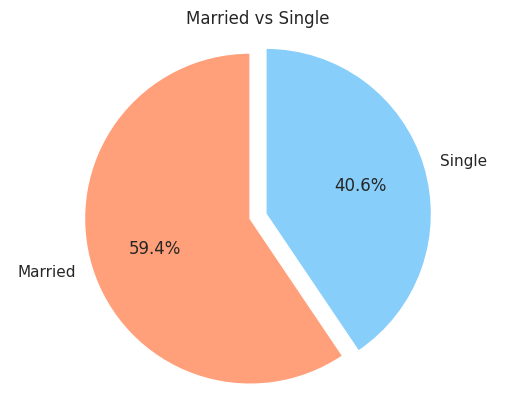

In [19]:
married_count = len(df[df["MaritalStatus"] == "Partnered"])
single_count = len(df[df["MaritalStatus"] == "Single"])

# Creating the pie chart
labels = ["Married", "Single"]
sizes = [married_count, single_count]
explode = (0, 0.1) # Exploding the "Single" slice of the pie
colors = ["#FFA07A", "#87CEFA"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")

# Setting the title of the pie chart
plt.title("Married vs Single")

# Displaying the pie chart
plt.show()

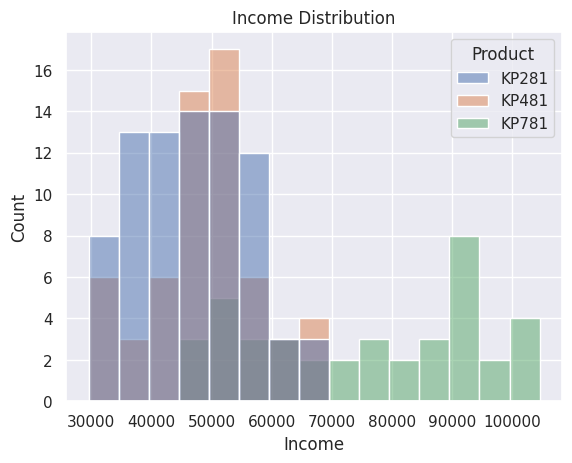

In [20]:
sns.histplot(data=df, x="Income" , hue = "Product")
plt.title("Income Distribution")
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='count'>

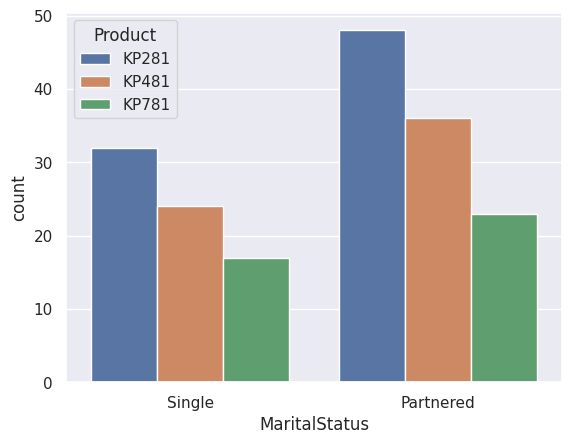

In [21]:
sns.countplot(x='MaritalStatus', hue='Product', data=df)

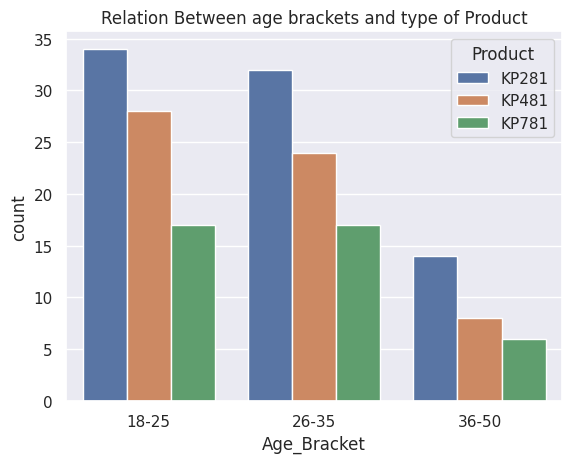

In [22]:
sns.countplot(x='Age_Bracket', hue='Product', data=df)
plt.title("Relation Between age brackets and type of Product")
plt.show()

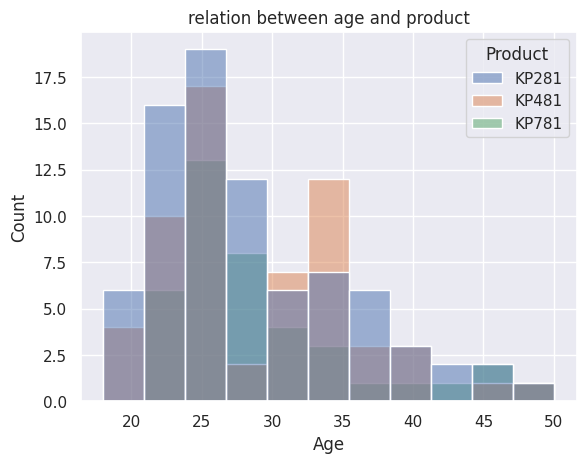

In [23]:
sns.histplot(x='Age', hue='Product', data=df)
plt.title("relation between age and product")
plt.show()

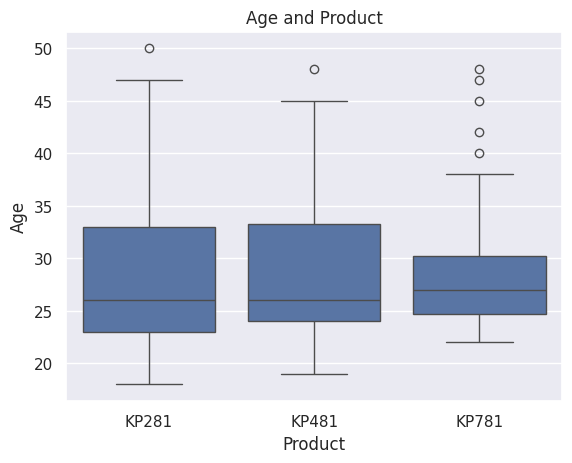

In [24]:
sns.boxplot(x='Product', y='Age', data=df)
plt.title("Age and Product")
plt.show()

In [25]:
marginal_prob = pd.crosstab(index=df['Product'], columns='count', normalize=True)
marginal_prob *= 100
marginal_prob

col_0,count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


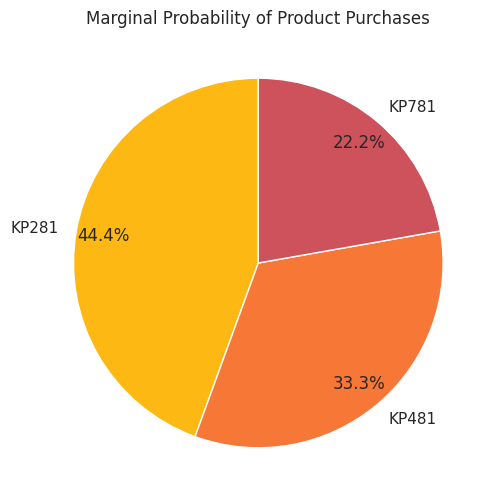

In [26]:
labels = marginal_prob.index.tolist()
sizes = marginal_prob.values.flatten().tolist()

# plot the pie chart
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
colors = ["#FDB813", "#F77737", "#CD525C"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title("Marginal Probability of Product Purchases")
plt.show()

In [27]:
# Filter the data to include only KP781 treadmills
kp781_df = df[df['Product'] == 'KP281']

# Count the number of male customers who bought the product
male_count = len(kp781_df[kp781_df['Gender'] == 'Male'])

# Count the total number of customers who bought the product
total_count = len(kp781_df)

# Calculate the probability of a male customer buying the product
prob_male_buy = male_count / total_count

prob_male_buy

0.5

Probability of a male customer buying KP781:   0.5


In [28]:
# Generate a correlation matrix for the dataframe
corr_matrix = df.corr()

# Set up the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)

# Add a title to the plot
ax.set_title('Correlation Heatmap')

# Show the plot
plt.show()


ValueError: could not convert string to float: 'KP281'

5.1

The Age attribute ranges from 18 to 50, which indicates that the data represents a sample of individuals aged between 18 and 50 years. The Education attribute ranges from 12 to 18, which indicates that the individuals in the dataset have completed education ranging from high school to college. The Income attribute ranges from 29562 to 104581, indicating a wide range of income levels.

The Miles attribute ranges from 38 to 188, which indicates that individuals in the dataset are using the fitness equipment for varying distances. The Usage attribute ranges from 2 to 5, which indicates how frequently individuals use the fitness equipment. The Fitness attribute ranges from 1 to 5, indicating the level of fitness of individuals in the dataset.

Overall, the range of attributes in this dataset is quite diverse, which may provide valuable insights into the behavior and characteristics of customers who purchase fitness equipment.

5.2 The distribution of variables

  1. We are having Three Products in our inventory.
  2. The age is ranging between 18 to 50.
  3. We can see that the count of males is higher than that of females from the pie chart plotted above.
  4. Almost 60% of the customers are married and the remaining are single.
  5. The income is having a pretty uneven distribution across the range , where majority is earning below 70,000 $
In terms of relationships between variables, there are a few notable patterns. Income and age are positively correlated, as are income and education. There is a weak positive correlation between income and miles run per week. Fitness and usage also show a weak positive correlation. Finally, there is no clear relationship between gender and any of the other variables.

In [29]:
cont_table1 = pd.crosstab(df["Gender"], df["Product"] , normalize = "index")

# display the table
print(cont_table1)

Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


In [30]:
cont_table2 = pd.crosstab(df["income range"], df["Product"] ,normalize = "index")

# display the table
print(cont_table2)

Product          KP281     KP481     KP781
income range                              
high          0.142857  0.166667  0.690476
low           1.000000  0.000000  0.000000
medium        0.532847  0.386861  0.080292


Based on the analysis of the customer data, here are my recommendations for Aerofit:

1] Promote the KP781 model in the high and medium income range bracket as they are more likely to buy it. The data shows that customers in the higher income brackets are more likely to purchase higher-end products. Therefore, Aerofit should focus on marketing and promoting the KP781 model to customers in these income ranges to increase sales.

2] Aerofit should also focus on marketing the products to married people, as they are more likely to buy the products than unmarried ones. This could be done by running targeted ads or creating campaigns that focus on the benefits of using Aerofit products for couples. Aerofit should also take into account the gender preferences for their products.

3] Females are more likely to buy the KP281 model than males, while the KP781 is preferred by males. This information could be used to develop targeted marketing campaigns for each model, highlighting the features that appeal most to each gender.